# Actividad 12: Regresión lineal

En esta actividad exploramos la **regresión lineal** como herramienta para analizar la relación entre variables ambientales.

1. Primero seguimos el ejemplo del curso con **TA vs DIC**.  
2. Luego realizamos dos ejercicios extra:  
   - Salinidad vs Temperatura  
   - DIC vs Salinidad  

Esta es una aplicación demostrativa. Aunque el ajuste y las métricas son útiles, la interpretación ecológica requiere considerar supuestos y el contexto ambiental.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np

# Importar dataset
CO2Data = pd.read_csv("../data/Terminos_lagoon_TA_DIC_2023_RawData.csv")


In [2]:
def run_linear_regression(x, y, x_label, y_label, filename):
    """
    Corre regresión lineal simple con scipy y statsmodels.
    Genera scatter + recta, imprime métricas y guarda figura.
    """
    # Scatter
    plt.scatter(x, y, label="Datos originales", alpha=0.7)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Línea de regresión (scipy)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, intercept + slope*x, "r", label="Recta ajustada")

    plt.legend()
    plt.gcf().set_size_inches(6,4)

    import os
    os.makedirs("../output_files", exist_ok=True)
    plt.savefig(f"../output_files/{filename}", dpi=300, bbox_inches="tight")
    plt.show()

    print("Resultados (scipy.stats.linregress):")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R²: {r_value**2:.3f}")
    print(f"p-value: {p_value:.4e}")
    print(f"Standard Error: {std_err:.4f}")

    # Ajuste OLS (statsmodels)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    print("\nResumen OLS:")
    print(model.summary())

    return model


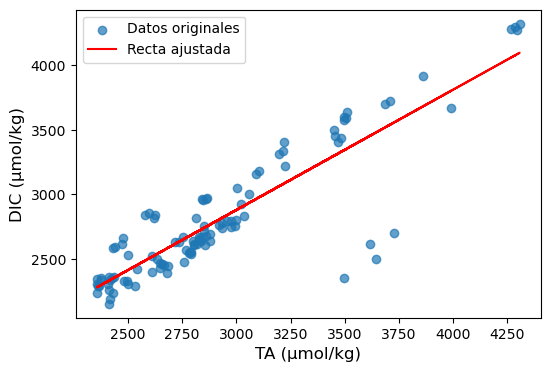

Resultados (scipy.stats.linregress):
Slope: 0.9330
Intercept: 80.3061
R²: 0.778
p-value: 8.1794e-36
Standard Error: 0.0488

Resumen OLS:
                            OLS Regression Results                            
Dep. Variable:        dic_micromol_kg   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     365.4
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           8.18e-36
Time:                        14:57:43   Log-Likelihood:                -728.75
No. Observations:                 106   AIC:                             1462.
Df Residuals:                     104   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025   

In [3]:
model_ta_dic = run_linear_regression(
    x=CO2Data["ta_micromol_kg"],
    y=CO2Data["dic_micromol_kg"],
    x_label="TA (μmol/kg)",
    y_label="DIC (μmol/kg)",
    filename="regresion_TA_vs_DIC.pdf"
)


## Ejercicios

1. Regresión lineal de **Salinidad vs Temperatura**  
2. Regresión lineal de **DIC vs Salinidad**


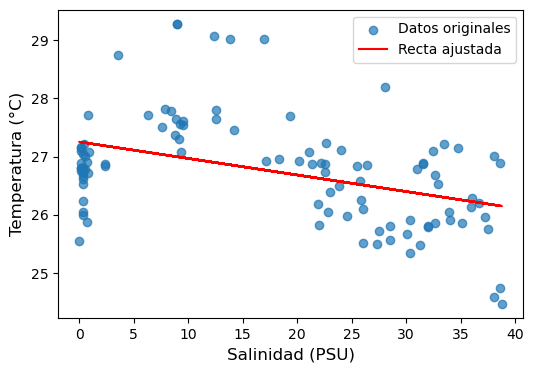

Resultados (scipy.stats.linregress):
Slope: -0.0285
Intercept: 27.2520
R²: 0.177
p-value: 6.8799e-06
Standard Error: 0.0060

Resumen OLS:
                            OLS Regression Results                            
Dep. Variable:                 temp_c   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     22.44
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           6.88e-06
Time:                        14:58:04   Log-Likelihood:                -130.39
No. Observations:                 106   AIC:                             264.8
Df Residuals:                     104   BIC:                             270.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

In [4]:
model_sal_temp = run_linear_regression(
    x=CO2Data["sal_psu"],
    y=CO2Data["temp_c"],
    x_label="Salinidad (PSU)",
    y_label="Temperatura (°C)",
    filename="regresion_Sal_vs_Temp.pdf"
)


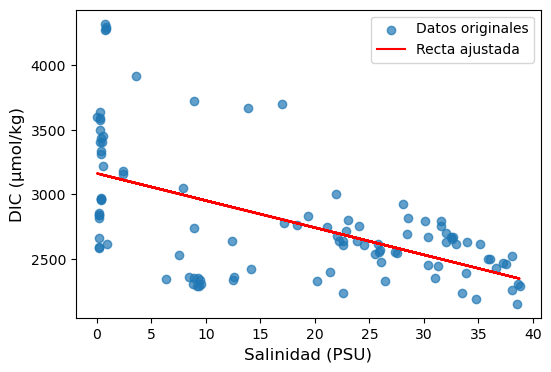

Resultados (scipy.stats.linregress):
Slope: -21.0532
Intercept: 3162.8748
R²: 0.327
p-value: 1.5144e-10
Standard Error: 2.9610

Resumen OLS:
                            OLS Regression Results                            
Dep. Variable:        dic_micromol_kg   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     50.56
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.51e-10
Time:                        14:58:17   Log-Likelihood:                -787.63
No. Observations:                 106   AIC:                             1579.
Df Residuals:                     104   BIC:                             1585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

In [5]:
model_dic_sal = run_linear_regression(
    x=CO2Data["sal_psu"],
    y=CO2Data["dic_micromol_kg"],
    x_label="Salinidad (PSU)",
    y_label="DIC (μmol/kg)",
    filename="regresion_DIC_vs_Sal.pdf"
)
